In [1]:
from genobs.lib import *
h = H_atom(0, "D2")
h

Quantum object: dims = [[24], [24]], shape = (24, 24), type = oper, isherm = True
Qobj data =
[[-2.68397359e+10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68397359e+10  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.68397359e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e

In [2]:
# def H_hfs_excited_D2():
#     """in uncoupled basis !"""
#     i_j = (
#             tensor(spin_Jz(3 / 2), spin_Jz(3 / 2))
#             + tensor(spin_Jy(3 / 2), spin_Jy(3 / 2))
#             + tensor(spin_Jx(3 / 2), spin_Jx(3 / 2))
#         )
#     return (
#             A_P32
#             * i_j
#             + B_P32
#             * (
#                 (
#                     3*(
#                     tensor(spin_Jz(3 / 2)**2, spin_Jz(3 / 2)**2)
#                     + tensor(spin_Jy(3 / 2)**2, spin_Jy(3 / 2)**2)
#                     + tensor(spin_Jx(3 / 2)**2, spin_Jx(3 / 2)**2)
#                     )
#                     + 3/2*i_j-3/2*(5/2)*3/2*5/2
#                 ) 
#                 / (2*3/2*(3-1)*3/2*(3-1))
#             )
#         )

In [3]:
# laser_freq = (get_ket_Fe_D2(3,3).dag()*h*get_ket_Fe_D2(3,3) - get_ket_Fg_D2(2,2).dag()*h*get_ket_Fg_D2(2,2))[0,0]
# Hyperfine Structure with Zeeman levels
b_longitudinal = 1
hb0 = H_hfs_ground() + H_B(bz=b_longitudinal)
eigvals, eigstates = hb0.eigenstates()
F_states_reordered = [
    eigstates[2],
    eigstates[1],
    eigstates[0],
]
for k in range(3, 3 + 5):
    F_states_reordered.append(eigstates[k])
h = H_atom(0, "D2").full()
det = h[-1, -1] - h[7, 7]
h = H_atom(det+2e9*2*pi, "D2").full()
h[:8, :8] = hb0.transform(F_states_reordered).tidyup(atol=1e-3).full()
shift = h[1, 1]
for k in range(24):
    h[k, k] = h[k, k] - shift
h = Qobj(h)
h_total = h + H_atom_field_D2(-1, E_0_plus(250e-6/(pi*(50e-6)**2)/2)) + H_atom_field_D2(1, E_0_plus(250e-6/(pi*(50e-6)**2)/2))

(<Figure size 800x600 with 2 Axes>,
 [<AxesSubplot: title={'center': 'F=2'}>,
  <AxesSubplot: title={'center': 'F=1'}>])

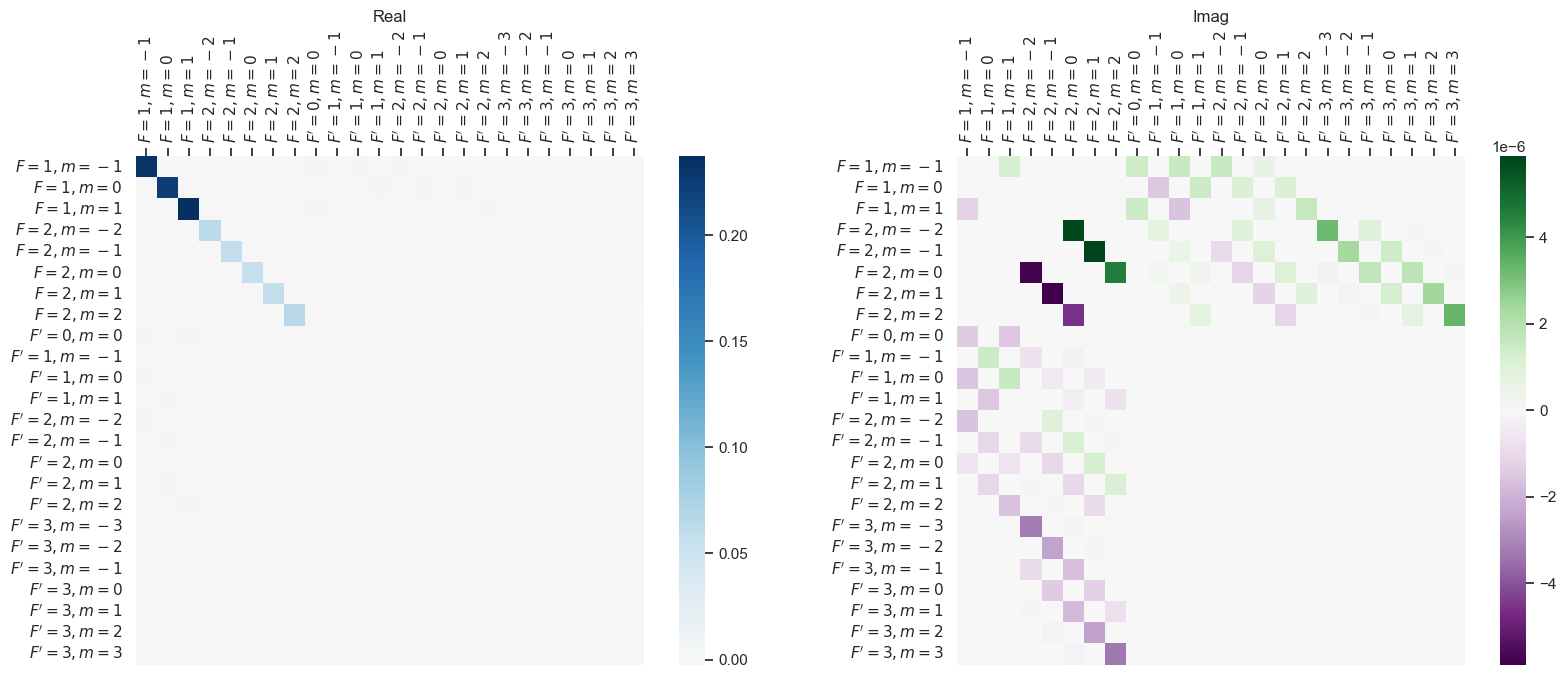

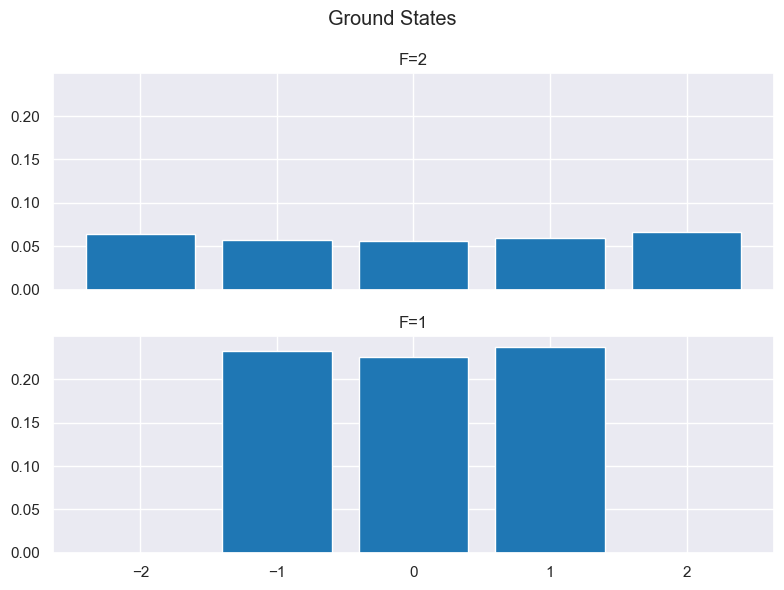

In [4]:
rho_ss = steadystate(h_total, c_op_list=natural_decay_ops_D2())
maplot(rho_ss)
plot_bar_ground_pop(rho_ss)

10.0%. Run time: 4675.61s. Est. time left: 00:11:41:20
20.0%. Run time: 9313.89s. Est. time left: 00:10:20:55
30.0%. Run time: 13146.30s. Est. time left: 00:08:31:14
40.0%. Run time: 15223.47s. Est. time left: 00:06:20:35
50.0%. Run time: 17308.67s. Est. time left: 00:04:48:28
60.0%. Run time: 19394.56s. Est. time left: 00:03:35:29
70.0%. Run time: 21476.77s. Est. time left: 00:02:33:24
80.0%. Run time: 23553.58s. Est. time left: 00:01:38:08
90.0%. Run time: 25627.44s. Est. time left: 00:00:47:27
Total run time: 27702.25s


(<Figure size 1200x600 with 10 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: xlabel='Time (s)'>, <AxesSubplot: >,
         <AxesSubplot: >]], dtype=object))

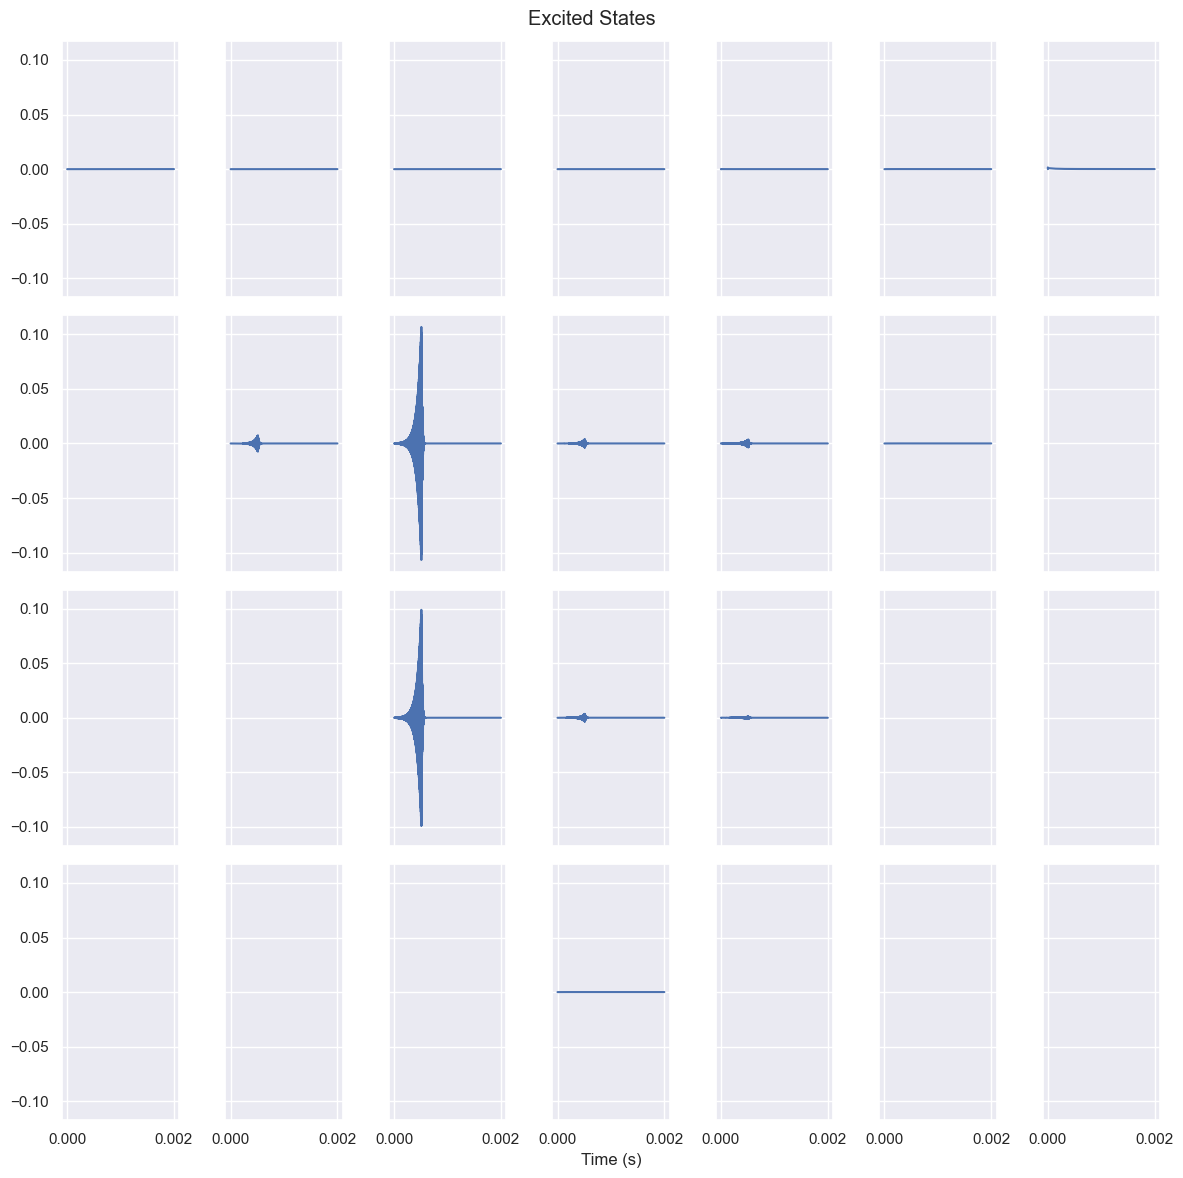

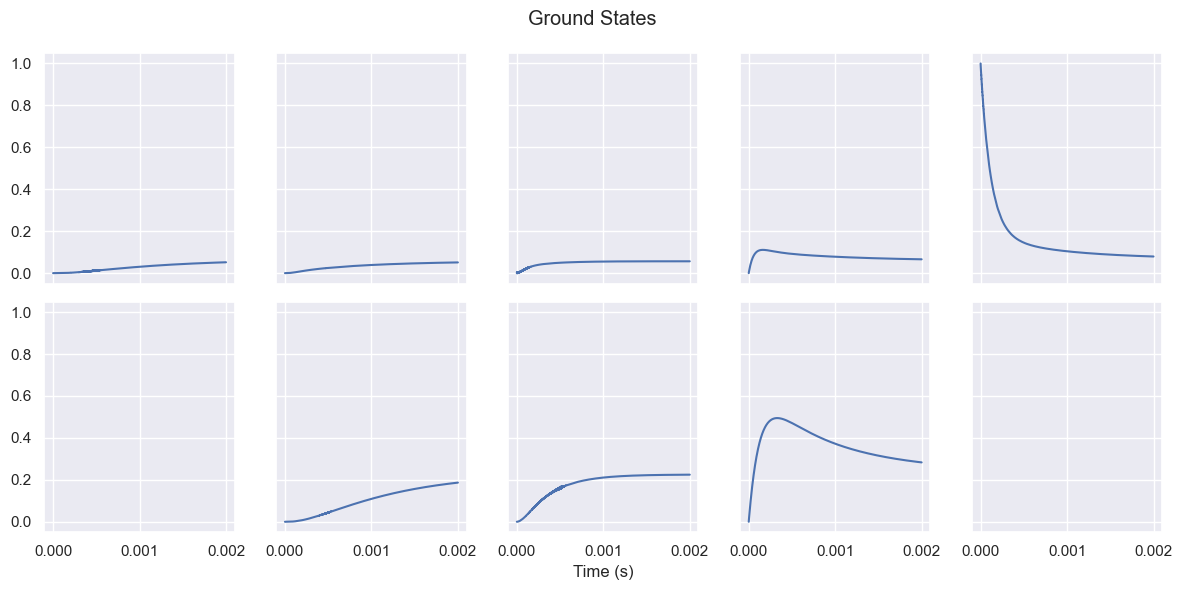

In [5]:
time_evo_options = Options(nsteps=2**10 * 1000)
times = np.linspace(0, 2e-3, 50000)
res = mesolve(
    h_total,
    rho0=get_ket_Fg_D2(2, 2).proj(),
    tlist=times,
    c_ops=natural_decay_ops_D2(),
    options=time_evo_options,
    progress_bar=True
)
plot_excited_states_time(res)
plot_ground_states_time(res)

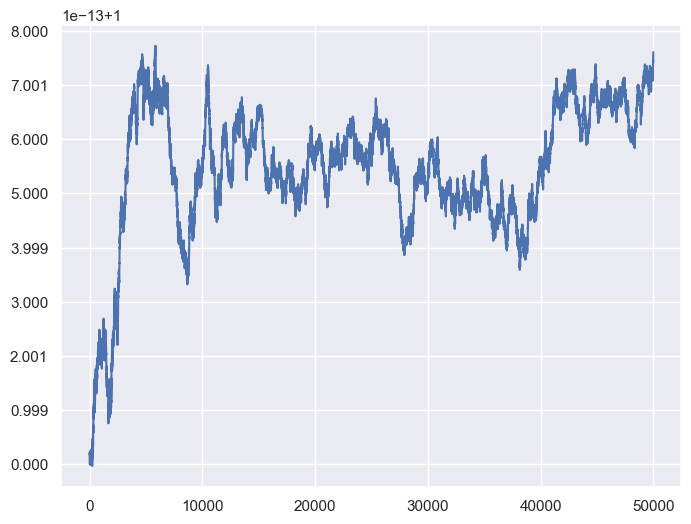

In [6]:
plt.plot([rho.tr() for rho in res.states])

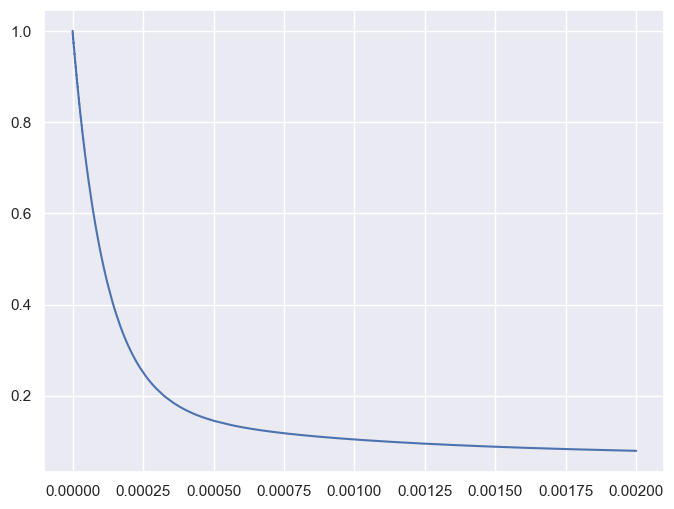

In [7]:
expect = [abs(rho[7, 7]) for rho in res.states]
plt.plot(times, expect)

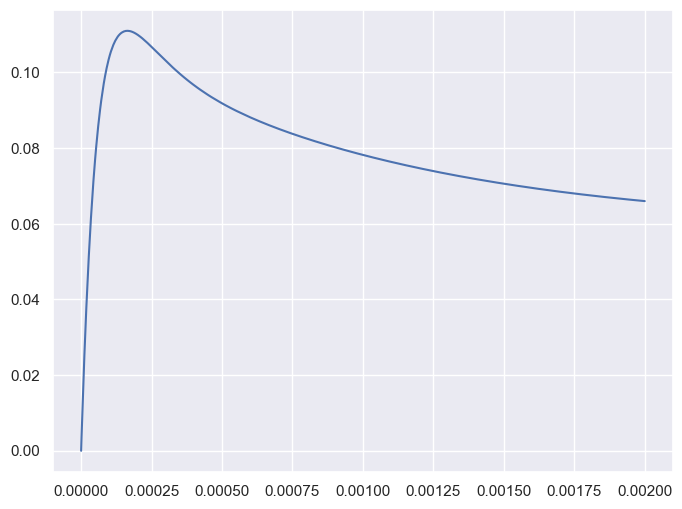

In [8]:
expect = [abs(rho[6, 6]) for rho in res.states]
plt.plot(times, expect)

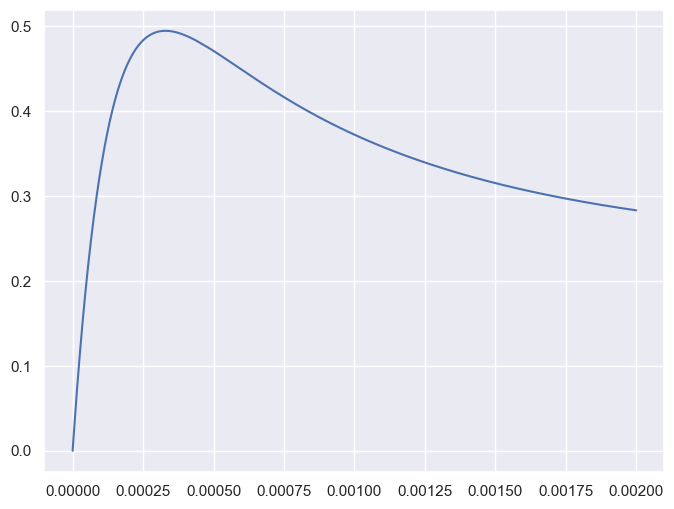

In [9]:
expect = [abs(rho[2, 2]) for rho in res.states]
plt.plot(times, expect)
# # %%
# times = np.linspace(1e-4, 2e-4, 2000)
# res = mesolve(
#     h_total,
#     rho0=res.states[-1],
#     tlist=times,
#     c_ops=natural_decay_ops_D2(),
#     options=time_evo_options,
#     progress_bar=True
# )
# plot_excited_states_time(res)
# plot_ground_states_time(res)
# # %%

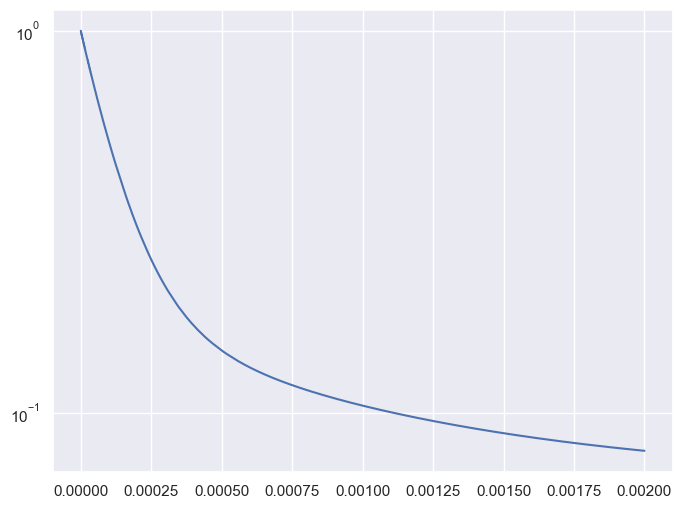

In [10]:
expect = [abs(rho[7, 7]) for rho in res.states]
plt.plot(times, expect)
plt.yscale("log")

In [11]:
H_B(bz=b_longitudinal).transform(F_states_reordered)

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 4.41037597e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.63010000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.61370590e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.80867317e+06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.41579653e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.62697044e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.79117365e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.63010000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.39287571e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.80867317e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.61370590e+03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.62697044e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.398

In [12]:
H_B(bz=b_longitudinal).transform(F_states_reordered) / (2*pi)

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 7.01933137e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.21436813e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.75139158e+02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.40194388e+06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.02795846e+05  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.21387005e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.39915874e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.21436813e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.99147884e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.40194388e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.75139158e+02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.21387005e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.000

In [13]:
qsave(res, "results")

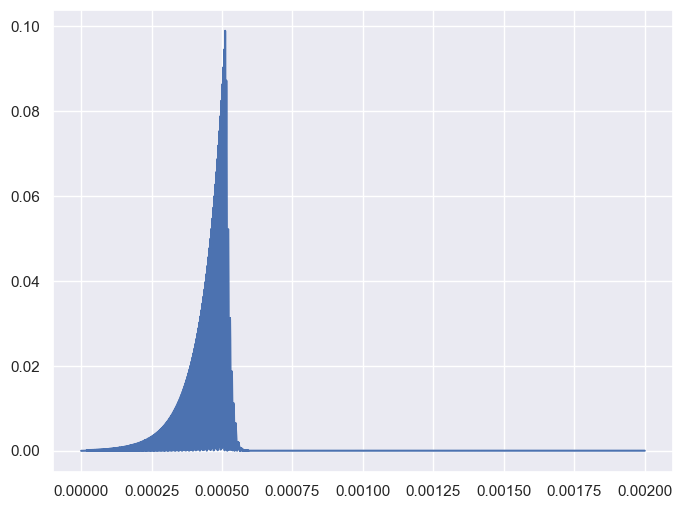

In [14]:
expect = [abs(rho[9, 9]) for rho in res.states]
plt.plot(times, expect)

In [15]:
len(times)

50000

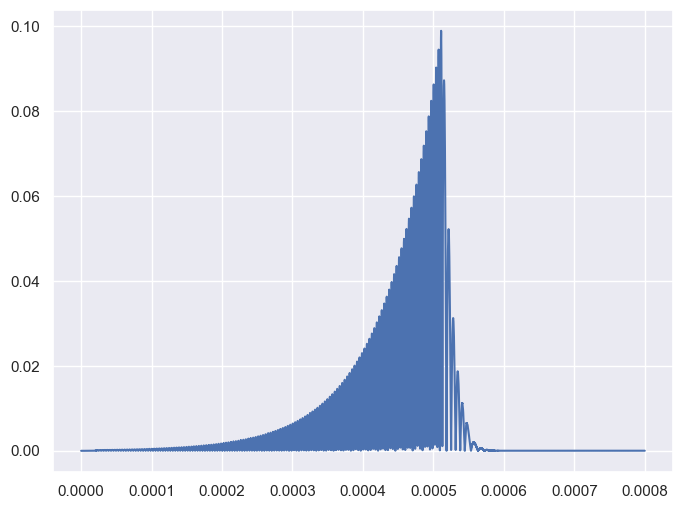

In [16]:
expect = [abs(rho[9, 9]) for rho in res.states]
plt.plot(times[:20000], expect[:20000])

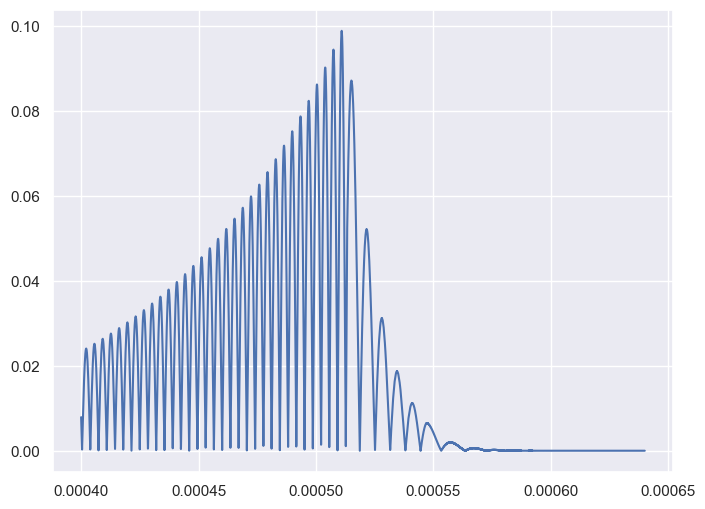

In [17]:
expect = [abs(rho[9, 9]) for rho in res.states]
plt.plot(times[10000:16000], expect[10000:16000])

In [18]:
from lmfit.model import Model


In [19]:
def double_exp(x, A=1, B=0.3, gamma1=0.1, gamma2=0.1):
    return A*np.exp(-x * gamma1) + B*np.exp(-x * gamma2)

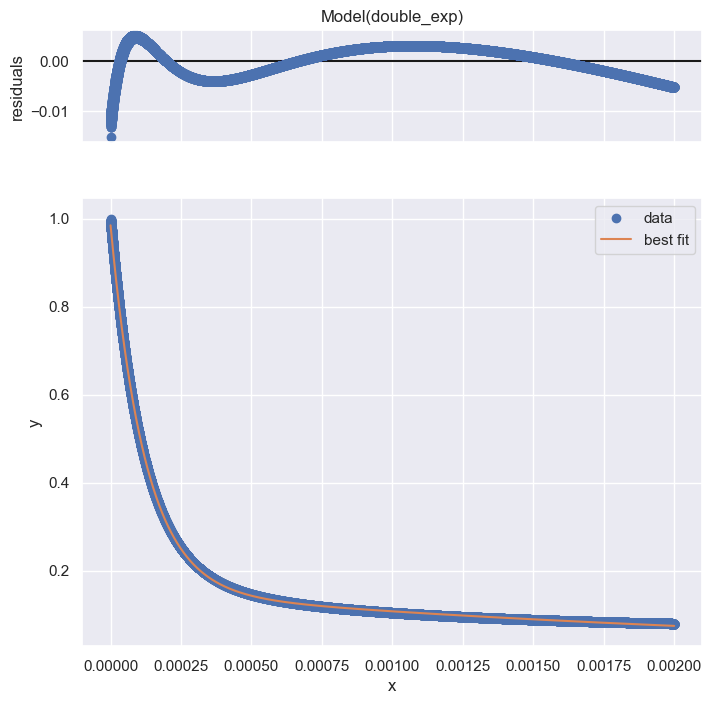

In [20]:
y = [abs(rho[7, 7]) for rho in res.states]
mod = Model(double_exp)
pars = mod.make_params()
fit_res = mod.fit(y, params=pars, x=times)
fit_res.plot()
fit_res